## Challenge 1. Diabetes ##

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np


In [45]:
df = pd.read_csv("./data/diabetes_012_health_indicators_BRFSS2021.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,2.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,...,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,...,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0


Looks like we will be predicting the first column i.e. Diabetes_012. So we have a classification problem at our hands. 

Lets first check for outliers and if the datasets need cleaning.

In [46]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [48]:
for column_name in df.columns:
   print(f"\n\n{column_name}")
   print(df[column_name].unique())




Diabetes_012
[0. 2. 1.]


HighBP
[0 1]


HighChol
[1. 0.]


CholCheck
[1 0]


BMI
[15. 28. 33. 29. 24. 40. 27. 30. 36. 31. 35. 22. 26. 45. 23. 25. 38. 21.
 32. 20. 34. 43. 18. 44. 19. 39. 37. 41. 16. 42. 50. 51. 49. 17. 52. 47.
 46. 56. 57. 48. 58. 61. 53. 63. 54. 68. 55. 62. 13. 59. 66. 77. 60. 87.
 64. 69. 72. 14. 75. 67. 71. 65. 82. 86. 70. 78. 12. 98. 84. 73. 74. 83.
 79. 88. 81. 76. 89. 90. 95. 85. 99. 91. 94. 92.]


Smoker
[1. 0.]


Stroke
[0. 1.]


HeartDiseaseorAttack
[0. 1.]


PhysActivity
[0 1]


Fruits
[1 0]


Veggies
[1 0]


HvyAlcoholConsump
[0 1]


AnyHealthcare
[1 0]


NoDocbcCost
[0. 1.]


GenHlth
[5. 2. 3. 4. 1.]


MentHlth
[10.  0.  5. 25.  2.  7. 30.  3. 14. 20.  8.  1. 15.  4. 28. 21. 12.  6.
 22. 27. 18. 24. 13. 17. 16.  9. 19. 29. 23. 11. 26.]


PhysHlth
[20.  0. 30. 25.  4. 10.  2.  3. 15.  8. 13. 14.  1.  5.  7.  6. 18.  9.
 16. 26. 28. 21. 27. 12. 29. 11. 17. 19. 24. 23. 22.]


DiffWalk
[0. 1.]


Sex
[0 1]


Age
[11  9 12 13 10  7  6  8  4  3  5  1  2]


Educ

In [49]:
df.isna().sum() # Check if there are any Na values

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

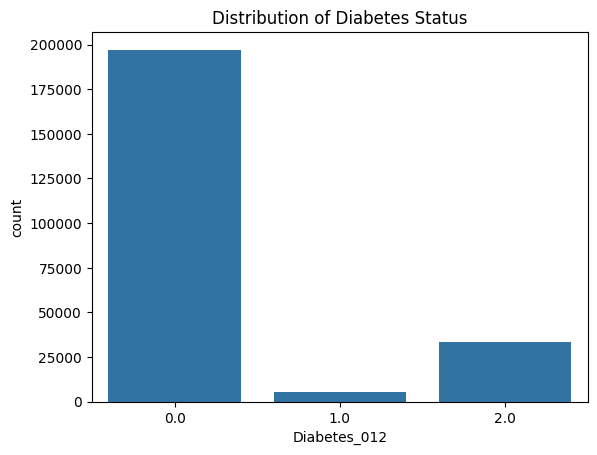

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Diabetes_012 variable
sns.countplot(x='Diabetes_012', data=df)
plt.title('Distribution of Diabetes Status')
plt.show()


### Understanding Variable distribution ###

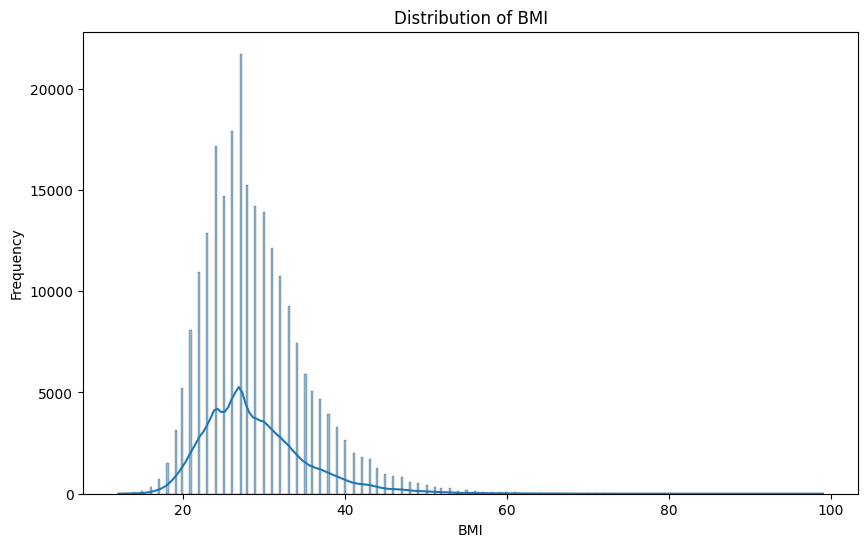

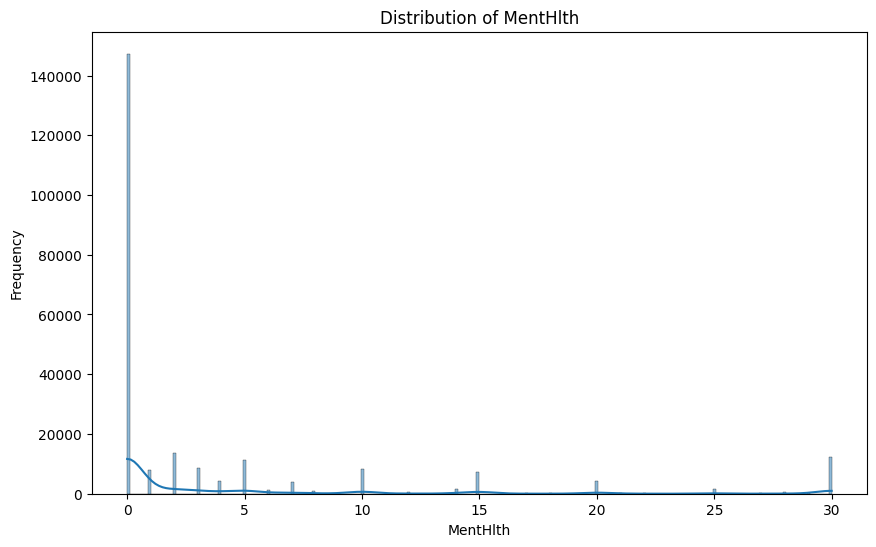

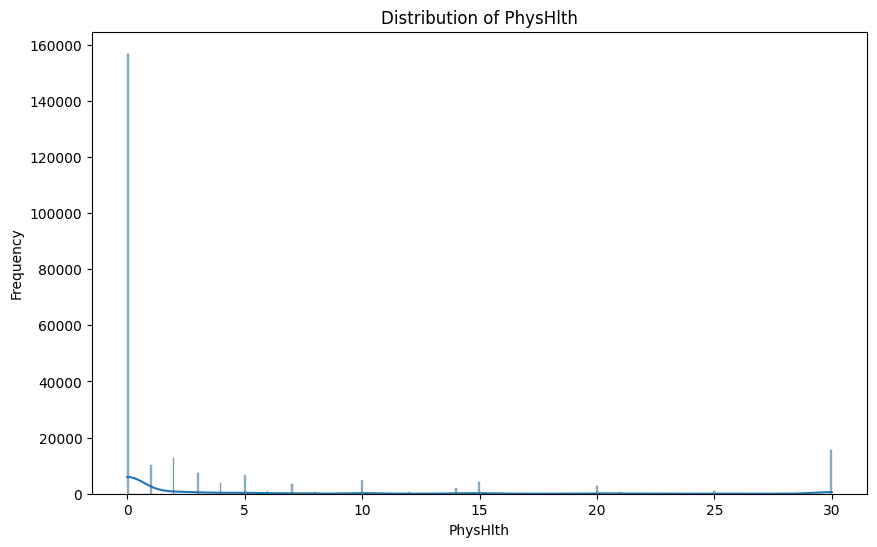

/tmp/ipykernel_6295/3777729861.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




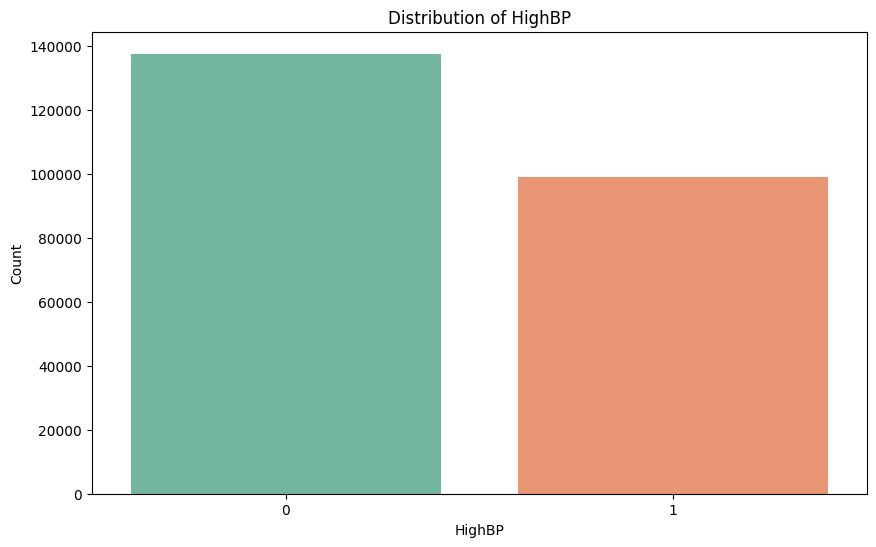

/tmp/ipykernel_6295/3777729861.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




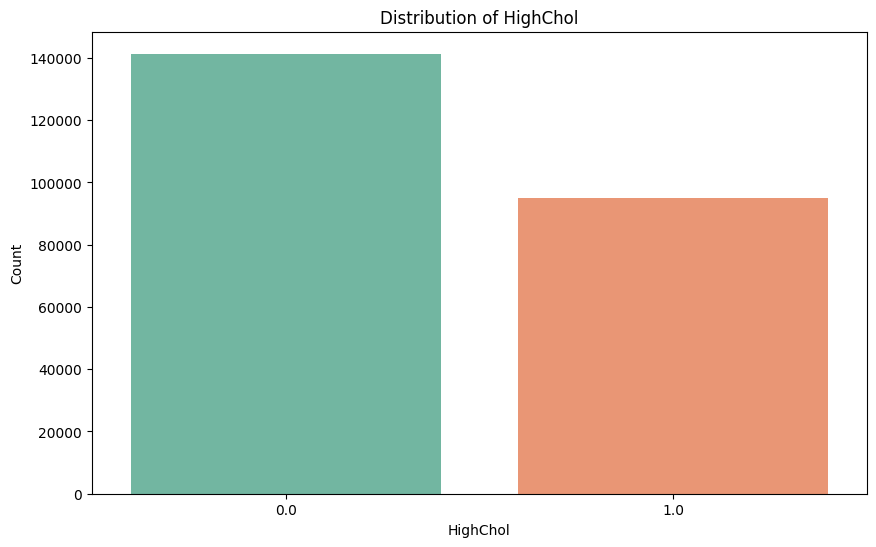

/tmp/ipykernel_6295/3777729861.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




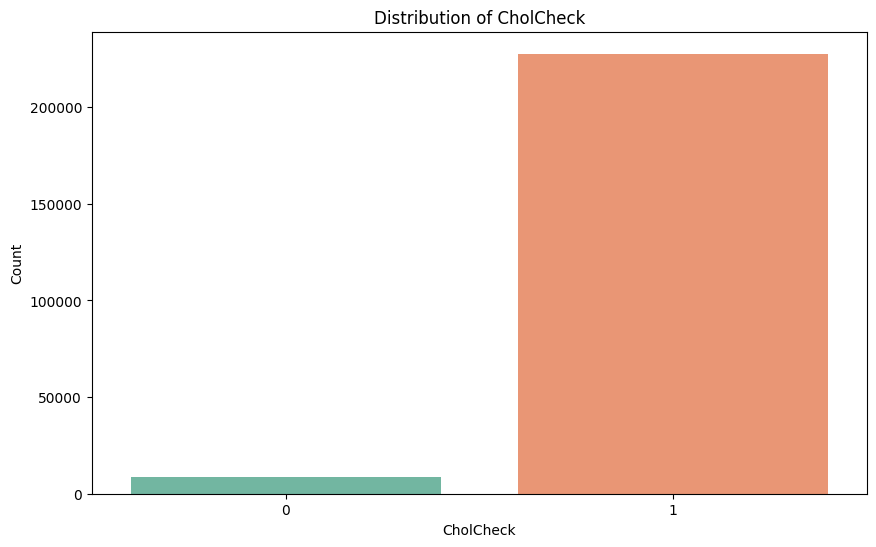

/tmp/ipykernel_6295/3777729861.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




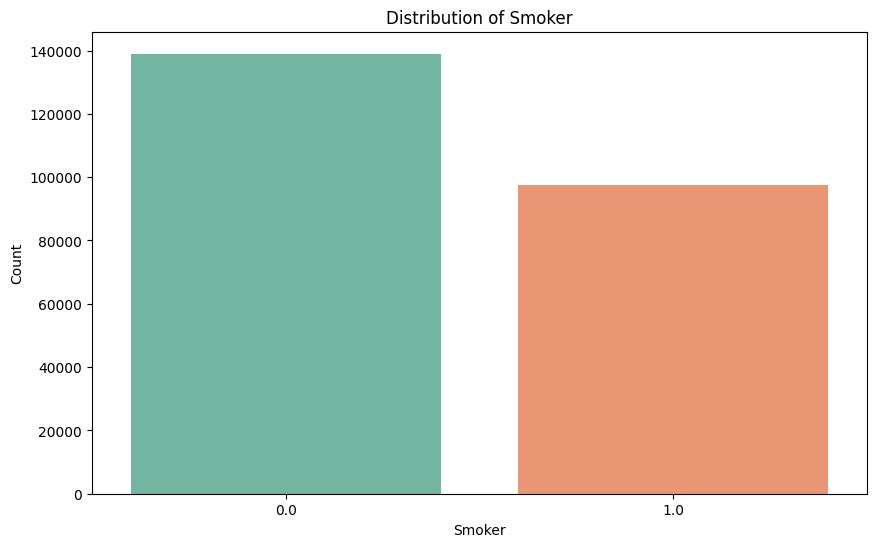

/tmp/ipykernel_6295/3777729861.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




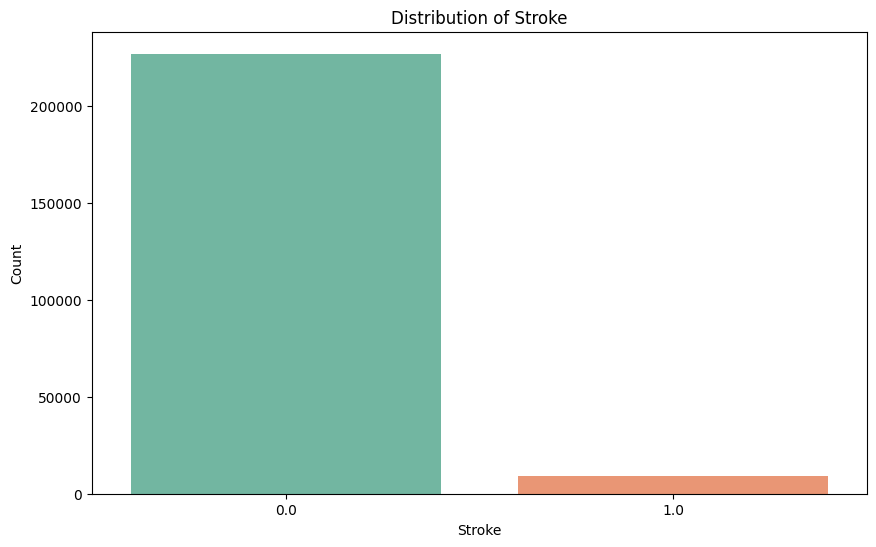

/tmp/ipykernel_6295/3777729861.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




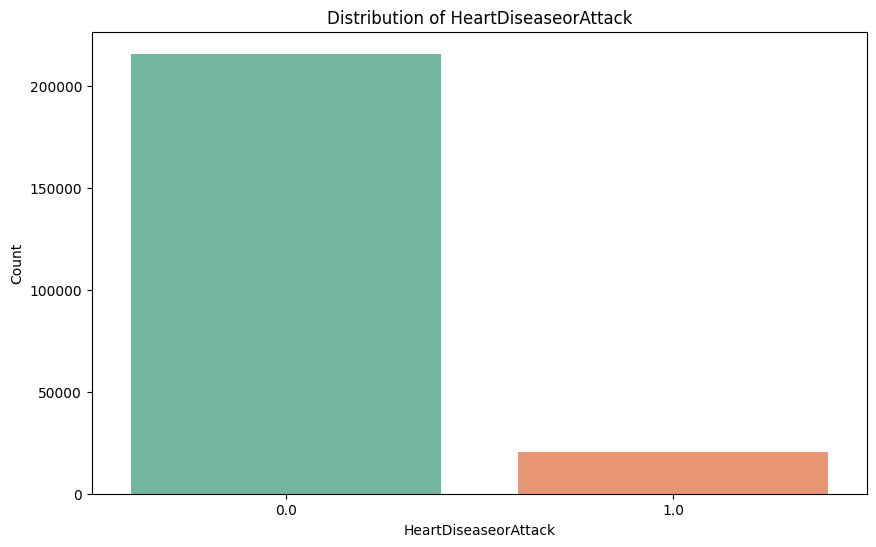

/tmp/ipykernel_6295/3777729861.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




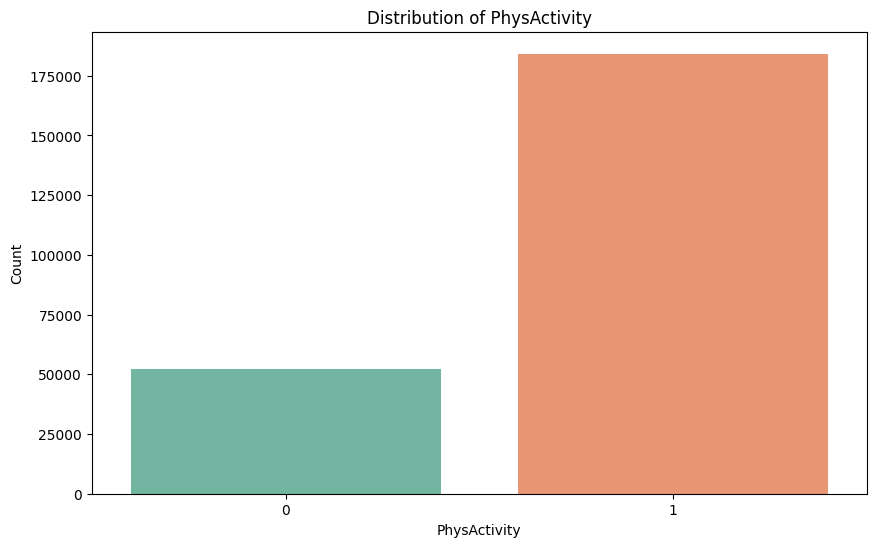

/tmp/ipykernel_6295/3777729861.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




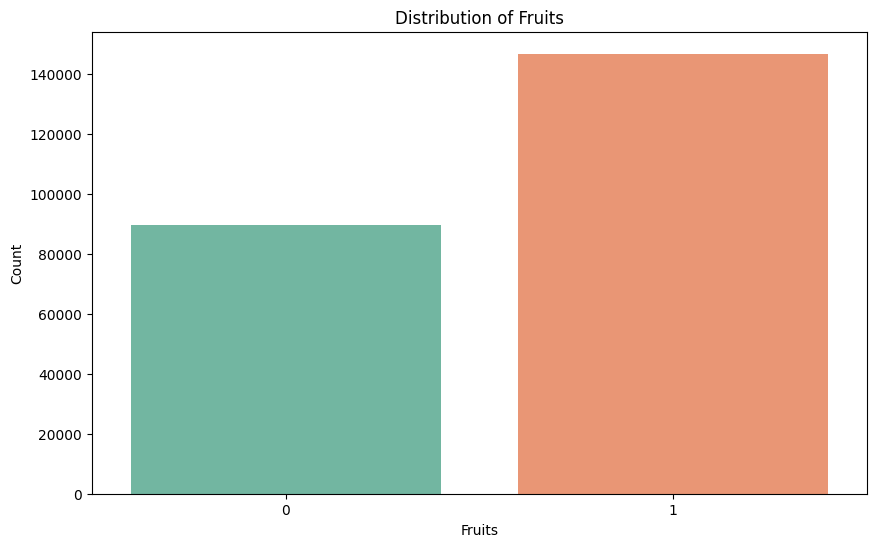

/tmp/ipykernel_6295/3777729861.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




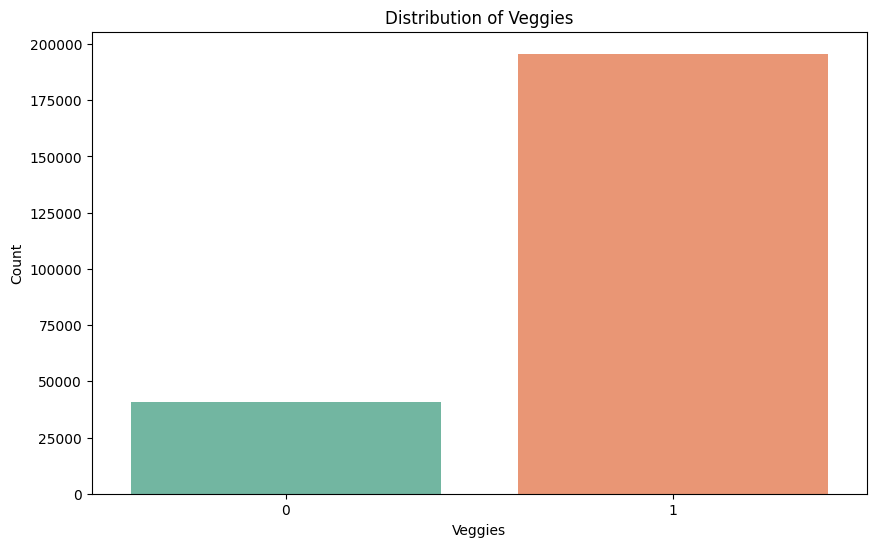

/tmp/ipykernel_6295/3777729861.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




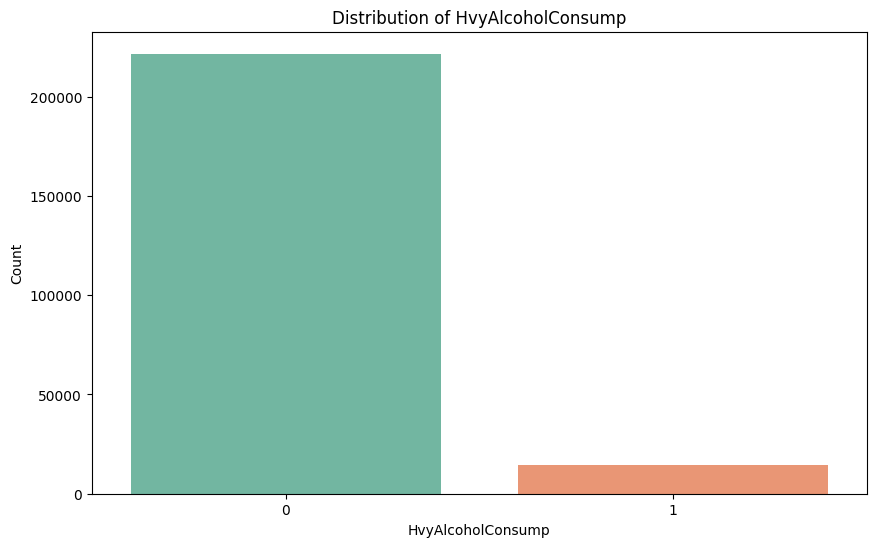

/tmp/ipykernel_6295/3777729861.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




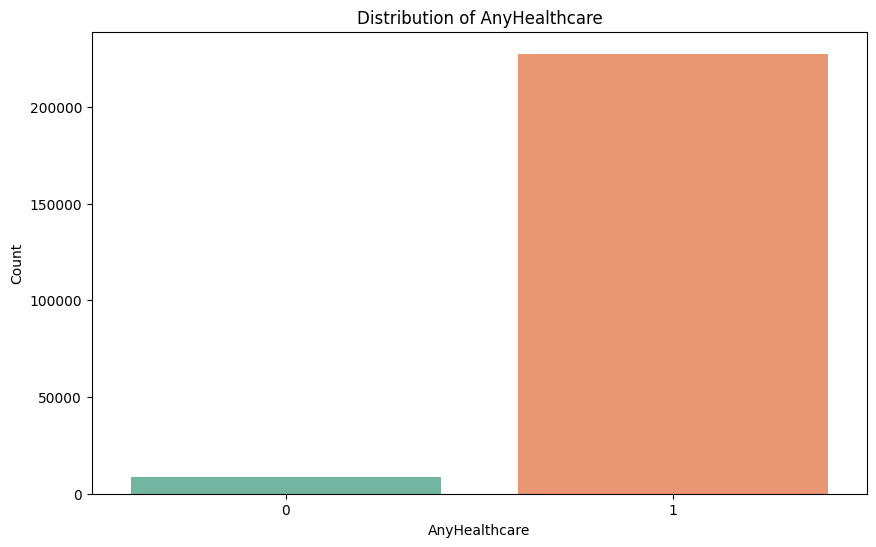

/tmp/ipykernel_6295/3777729861.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




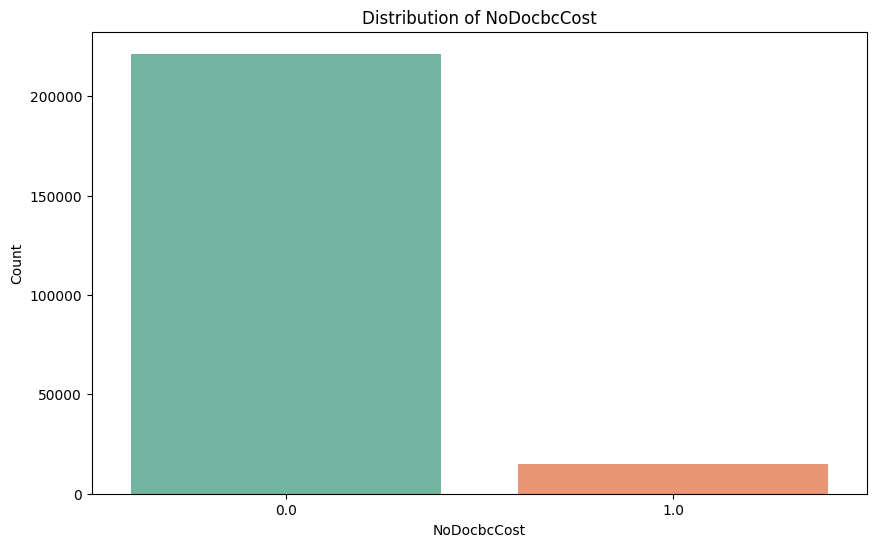

/tmp/ipykernel_6295/3777729861.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




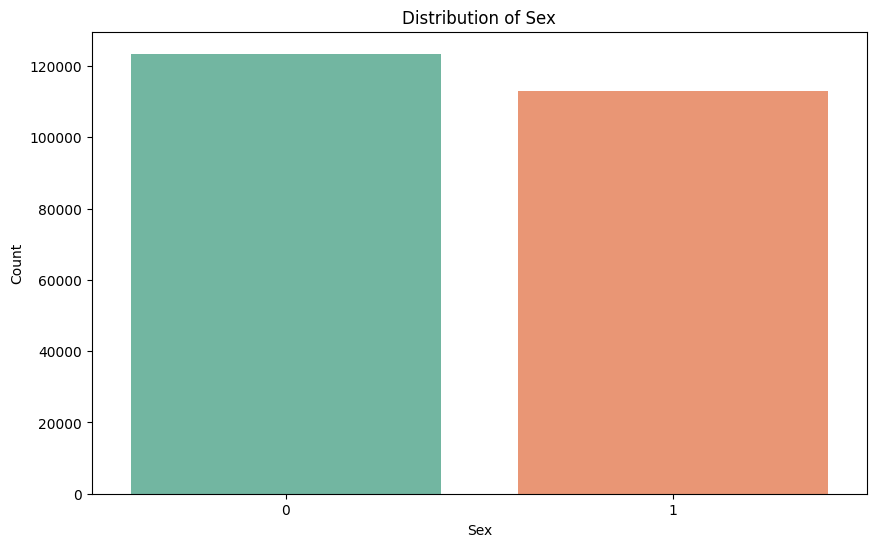

In [51]:
continuous_vars = ['BMI', 'MentHlth', 'PhysHlth']

# List of categorical variables (excluding 'Diabetes_012' as it's a special case)
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Sex']

# Plot histograms or density plots for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)  # kde for density plot
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Plot bar charts for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df, palette='Set2')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

### Co-relation between vars ###

In [67]:
df.corr()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.269086,0.207435,0.072222,0.211801,0.058910,0.102715,0.177432,-0.151657,-0.030489,...,0.026366,0.016355,0.288377,0.039154,0.163922,0.216233,0.033815,0.198600,-0.108539,-0.160146
HighBP,0.269086,1.000000,0.283285,0.099415,0.213951,0.099570,0.126594,0.203191,-0.132253,-0.031542,...,0.049833,-0.007477,0.281555,0.011743,0.140946,0.208262,0.067557,0.345390,-0.106342,-0.150292
HighChol,0.207435,0.283285,1.000000,0.098558,0.087188,0.082402,0.085947,0.170668,-0.076648,-0.024408,...,0.056505,-0.012307,0.187101,0.019851,0.104846,0.127667,0.029081,0.287937,-0.035434,-0.068196
CholCheck,0.072222,0.099415,0.098558,1.000000,0.036226,-0.012874,0.025386,0.043867,-0.008454,0.024951,...,0.154640,-0.071406,0.042176,-0.015560,0.031339,0.044966,-0.048143,0.102707,0.030341,0.021765
BMI,0.211801,0.213951,0.087188,0.036226,1.000000,0.016289,0.010241,0.039518,-0.163979,-0.089897,...,-0.009609,0.048165,0.254835,0.088455,0.120976,0.199165,0.007928,-0.050161,-0.098964,-0.102487
Smoker,0.058910,0.099570,0.082402,-0.012874,0.016289,1.000000,0.057064,0.111283,-0.093729,-0.071277,...,-0.023686,0.046932,0.166432,0.084626,0.113428,0.123640,0.073719,0.123354,-0.178179,-0.148127
Stroke,0.102715,0.126594,0.085947,0.025386,0.010241,0.057064,1.000000,0.177667,-0.078759,-0.000428,...,0.015463,0.021849,0.159723,0.045176,0.131955,0.162562,0.001288,0.128892,-0.061672,-0.115004
HeartDiseaseorAttack,0.177432,0.203191,0.170668,0.043867,0.039518,0.111283,0.177667,1.000000,-0.097710,-0.006846,...,0.025104,0.014479,0.239646,0.034660,0.170468,0.194299,0.085596,0.223501,-0.080808,-0.124740
PhysActivity,-0.151657,-0.132253,-0.076648,-0.008454,-0.163979,-0.093729,-0.078759,-0.097710,1.000000,0.118245,...,0.024926,-0.050100,-0.284207,-0.116034,-0.248385,-0.284294,0.058629,-0.119369,0.211932,0.239828
Fruits,-0.030489,-0.031542,-0.024408,0.024951,-0.089897,-0.071277,-0.000428,-0.006846,0.118245,1.000000,...,0.019495,-0.029629,-0.082256,-0.058411,-0.032673,-0.029691,-0.053992,0.071838,0.087289,0.053229


This shows that our dataset is pretty much imbalanced

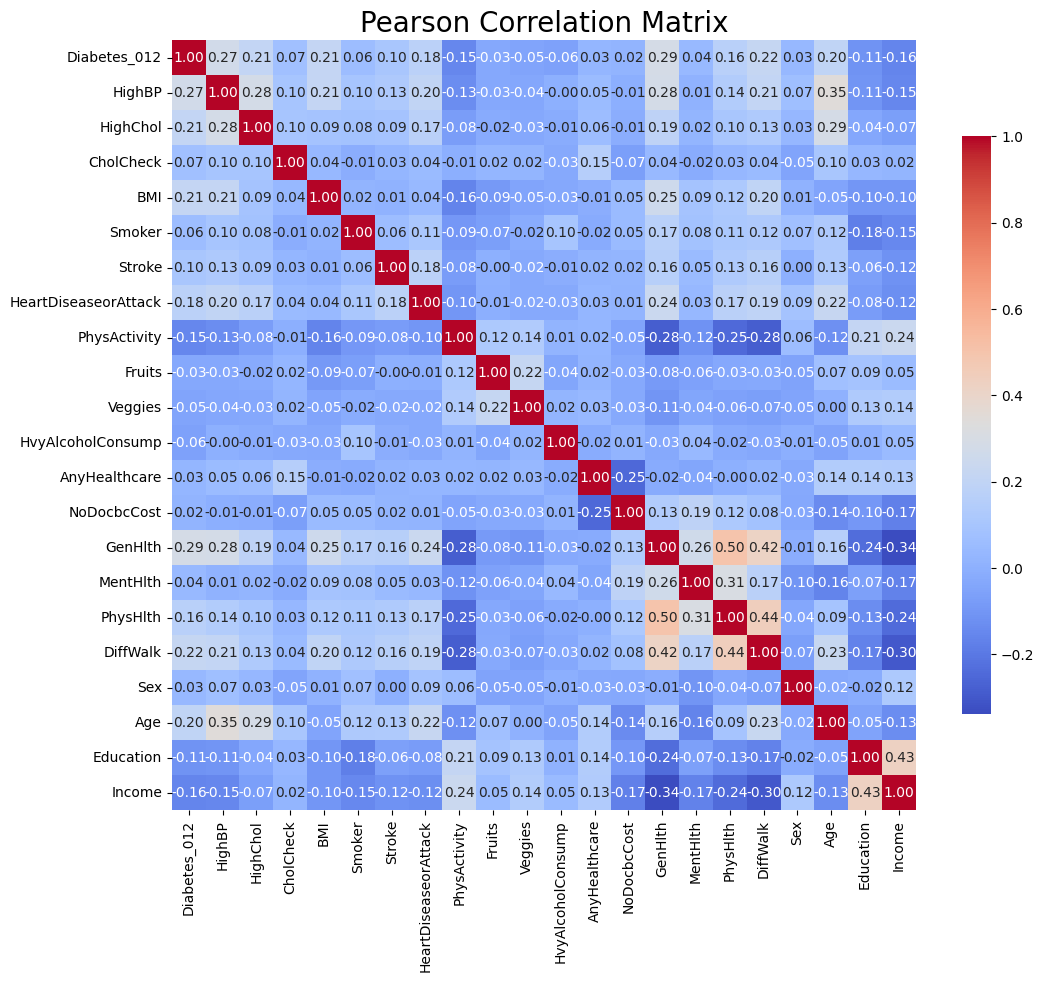

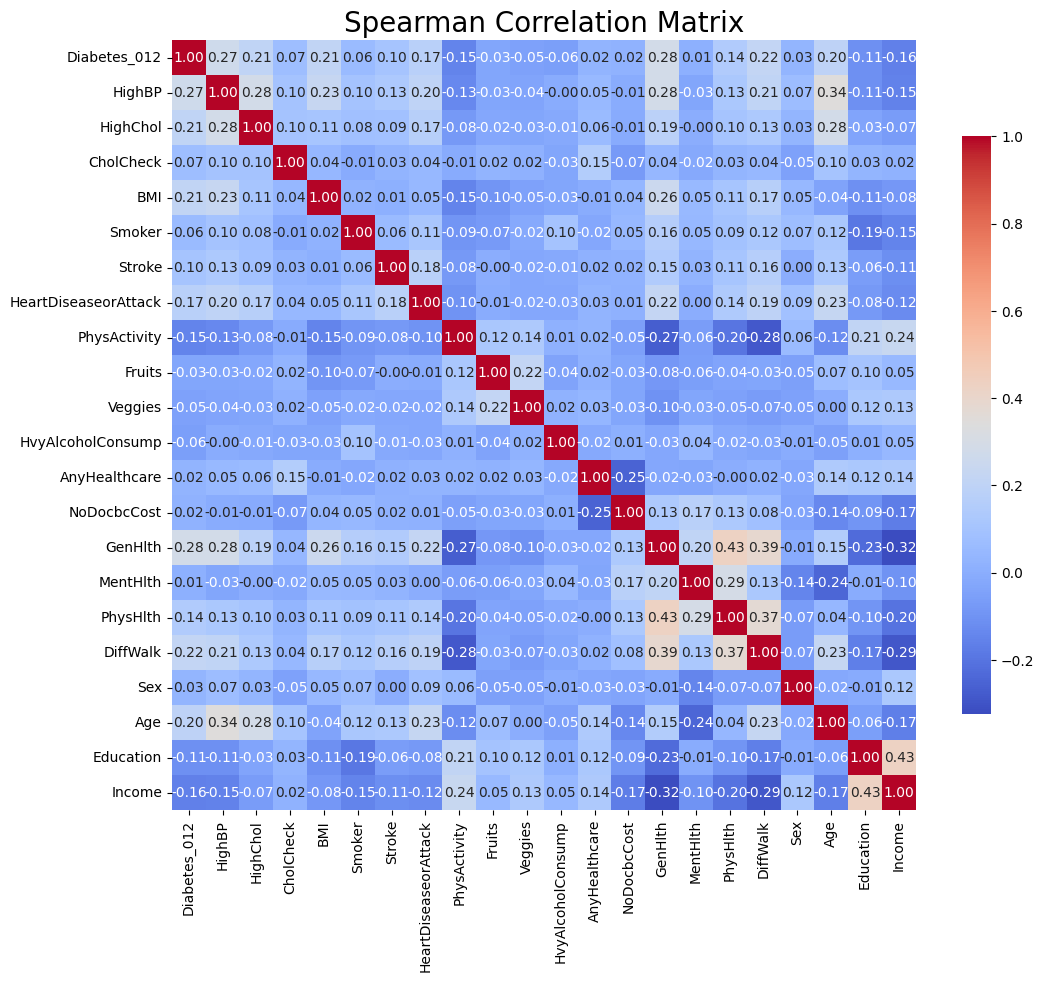

In [54]:
# Calculate Pearson correlation matrix
pearson_corr = df.corr(method='pearson')

# Calculate Spearman correlation matrix
spearman_corr = df.corr(method='spearman')

# Set up the matplotlib figure for Pearson Correlation Matrix
plt.figure(figsize=(12, 10))
plt.title('Pearson Correlation Matrix', fontsize=20)
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .75})
plt.show()

# Set up the matplotlib figure for Spearman Correlation Matrix
plt.figure(figsize=(12, 10))
plt.title('Spearman Correlation Matrix', fontsize=20)
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .75})
plt.show()

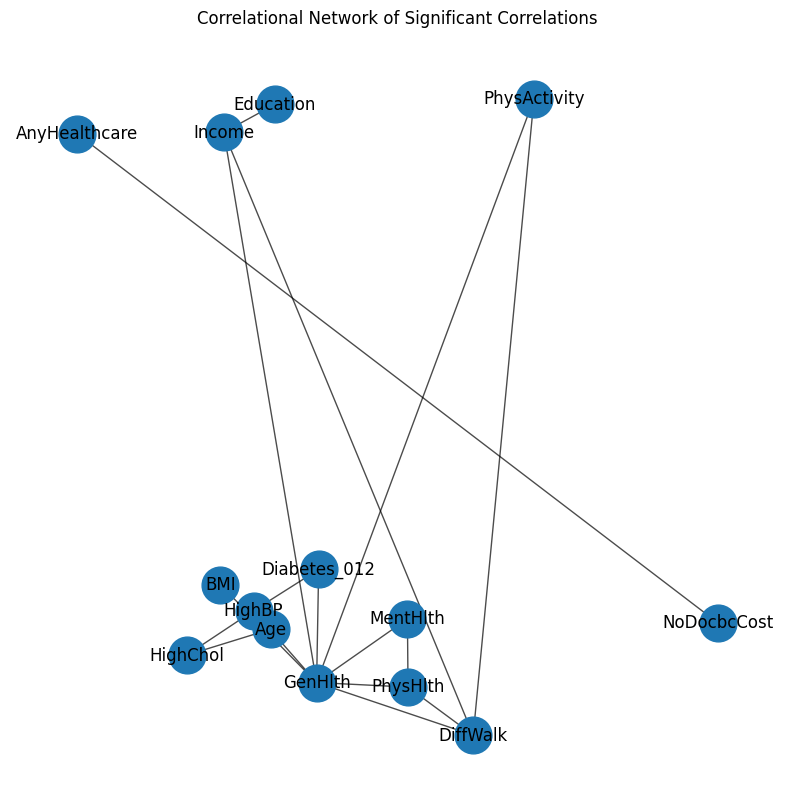

In [55]:
# Previous graphs are tedious to watch and make sense of. This helps to understand correlations.
corr = df.corr()

threshold = float(input("Enter correlation threshold."))  # Example threshold
corr_filtered = corr.where(np.abs(corr) >= threshold, 0)  # Apply threshold

np.fill_diagonal(corr_filtered.values, 0)

cols_with_non_self_corr = corr_filtered.loc[:, (corr_filtered != 0).any(axis=0)].columns

corr_filtered = corr_filtered.loc[cols_with_non_self_corr, cols_with_non_self_corr]

G = nx.from_pandas_adjacency(corr_filtered)

pos = nx.spring_layout(G, seed=42)

if not nx.is_empty(G):
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)

    plt.title("Correlational Network of Significant Correlations")
    plt.axis('off')
    plt.show()
else:
    print("No significant correlations found between different variables based on the specified threshold.")




### Analysis of Diabetes Status ###

To explore the relationship between diabetes status and other variables, we'll calculate the mean for numerical variables and distribution for categorical variables across different diabetes statuses.

In [57]:
numerical_vars = ['BMI', 'MentHlth', 'PhysHlth']

# Group by Diabetes_012 and calculate mean for each numerical variable
grouped_data = df.groupby('Diabetes_012')[numerical_vars].mean()

print("Mean values of numerical variables by diabetes status:")
print(grouped_data)

Mean values of numerical variables by diabetes status:
                    BMI  MentHlth  PhysHlth
Diabetes_012                               
0.0           28.331207  3.795863  3.161209
1.0           31.477309  4.735184  5.078128
2.0           32.187172  4.637482  6.995591


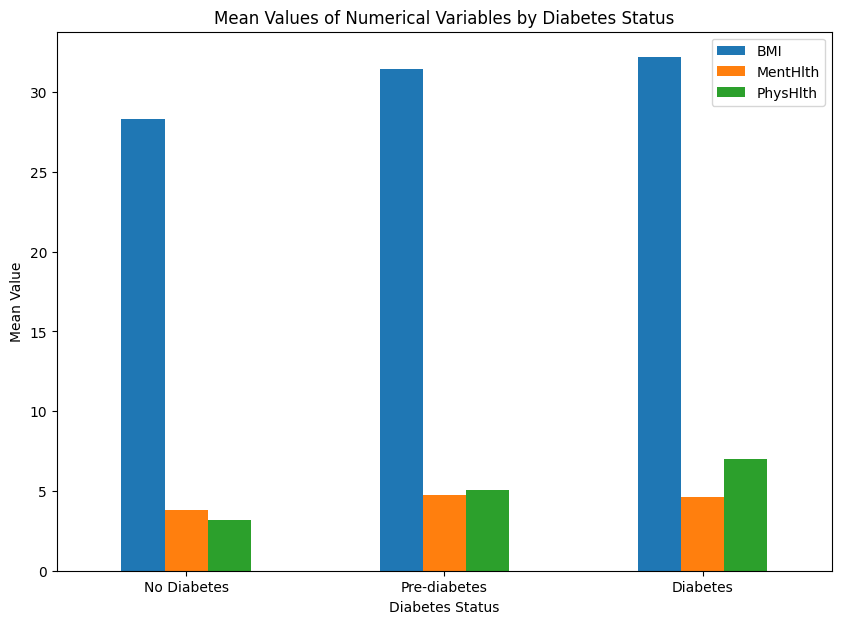

In [59]:
grouped_data.plot(kind='bar', figsize=(10, 7))
plt.title('Mean Values of Numerical Variables by Diabetes Status')
plt.ylabel('Mean Value')
plt.xlabel('Diabetes Status')
plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes', 'Pre-diabetes', 'Diabetes'], rotation=0)  # Adjust as needed
plt.show()

For categorical variables, we'll calculate the distribution within each diabetes status category.

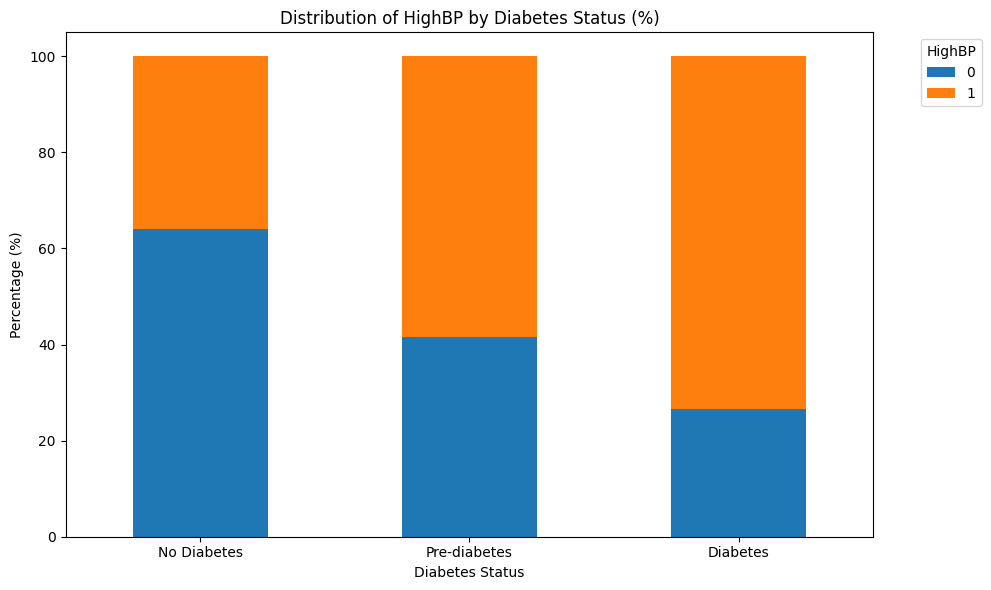

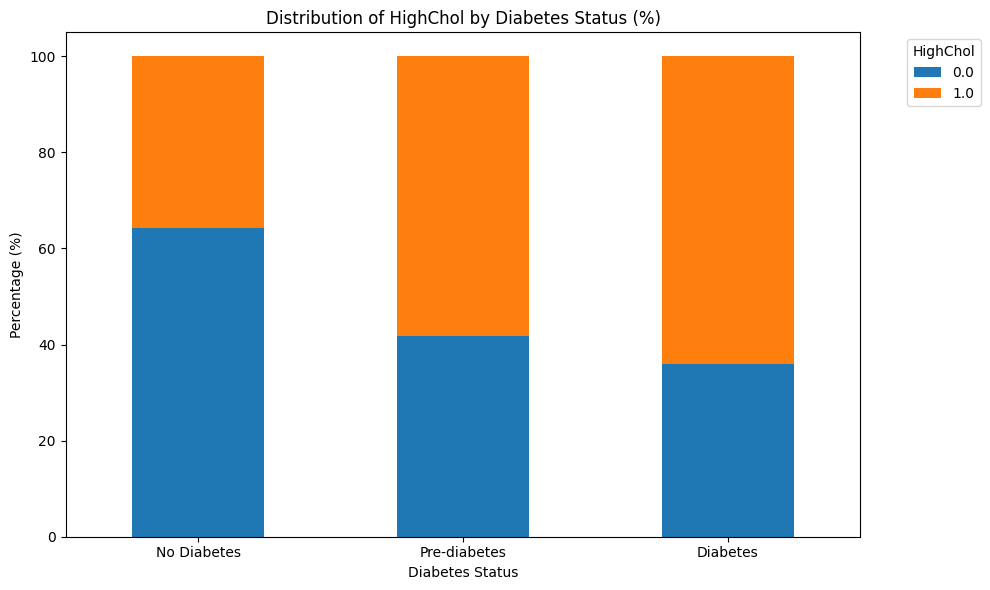

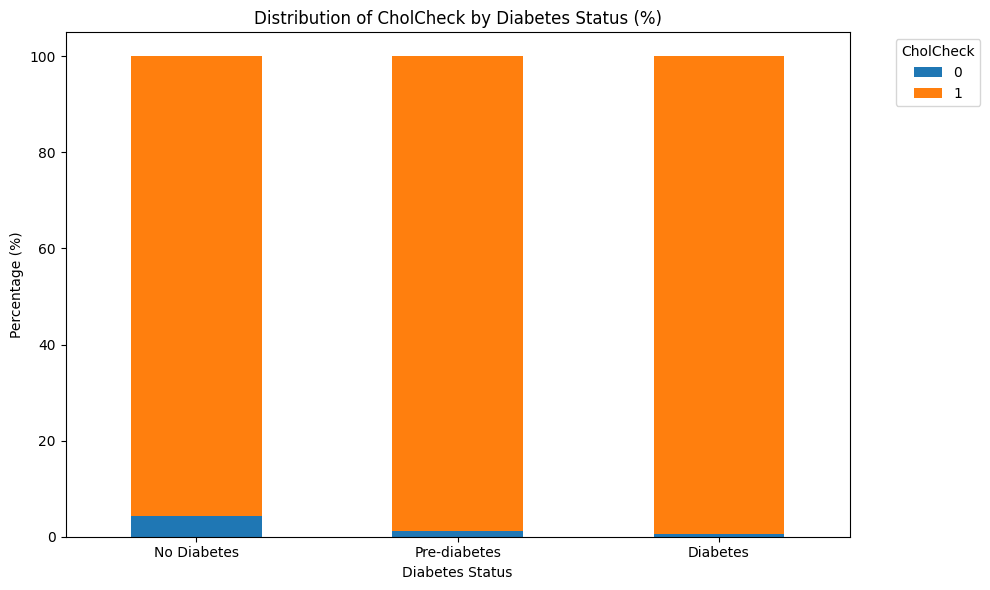

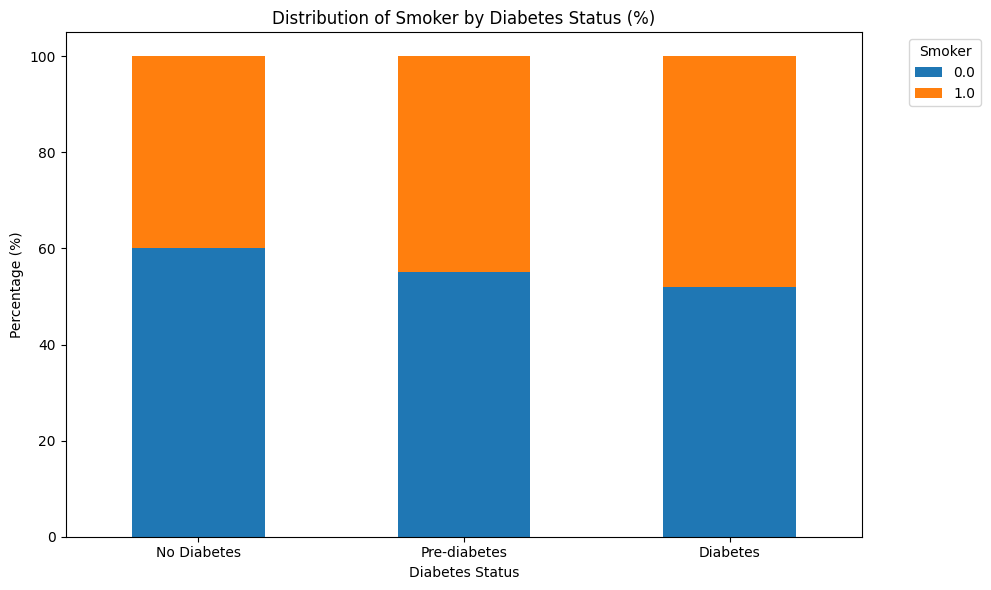

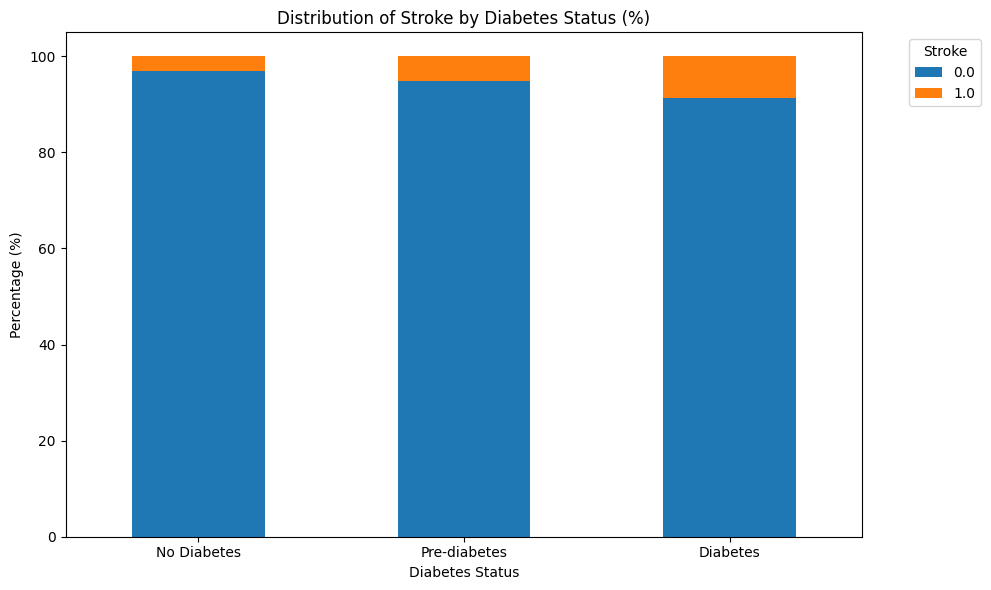

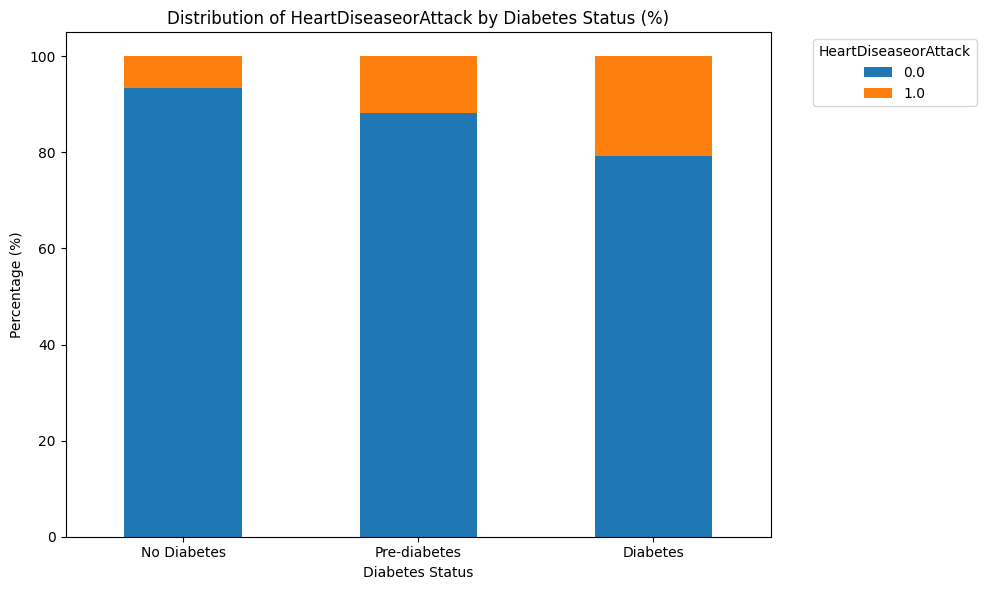

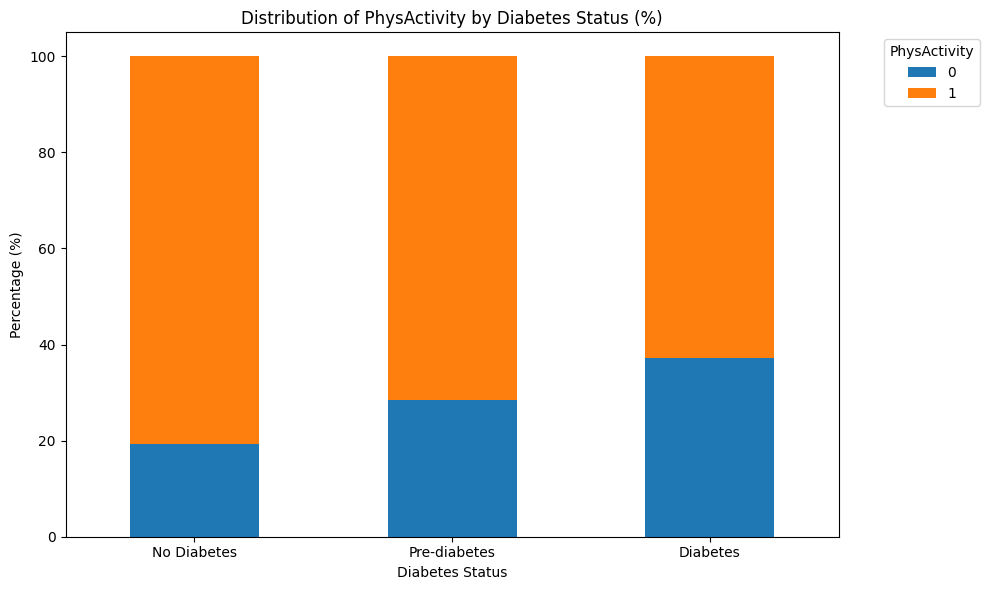

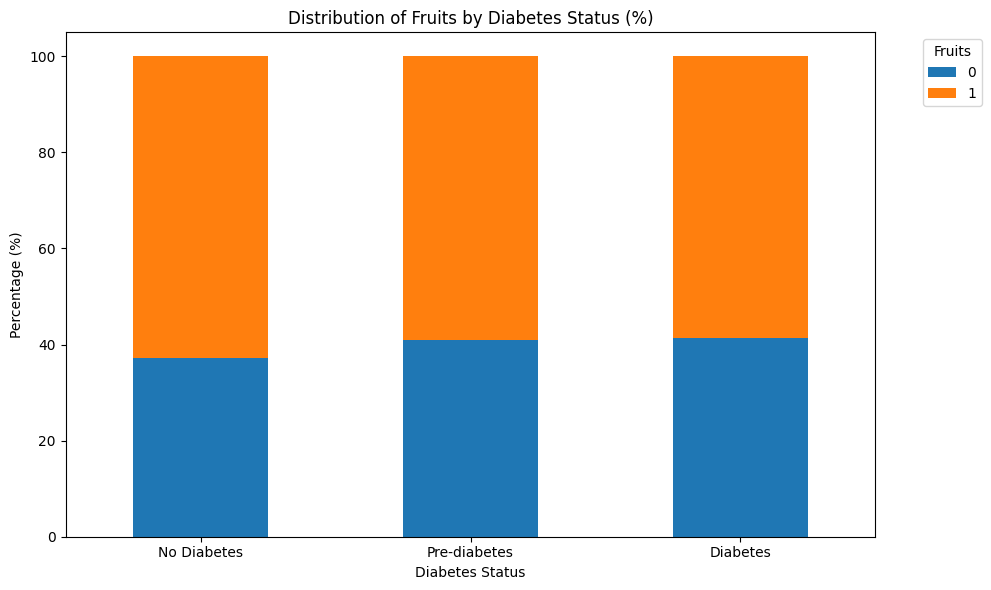

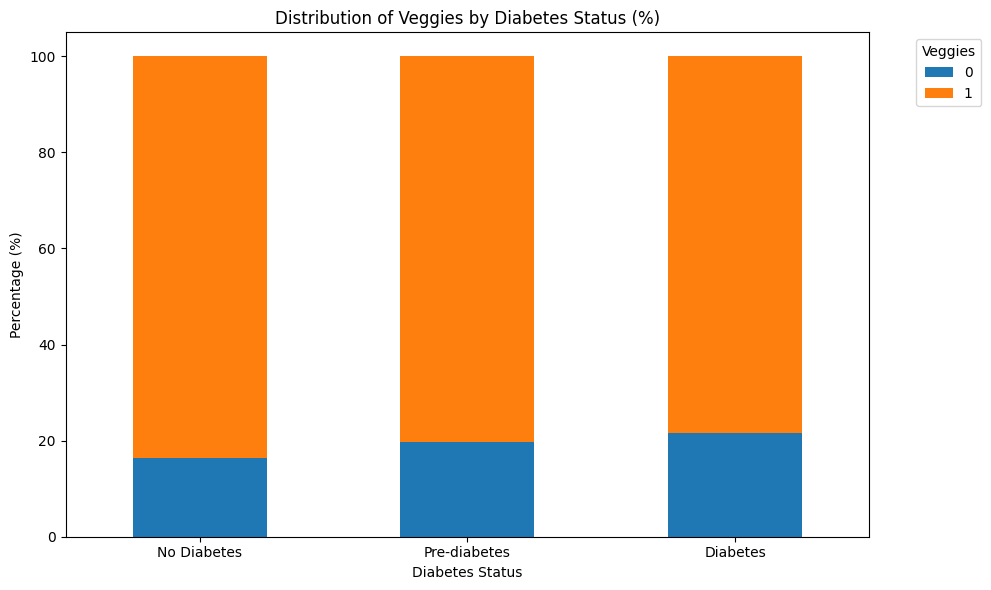

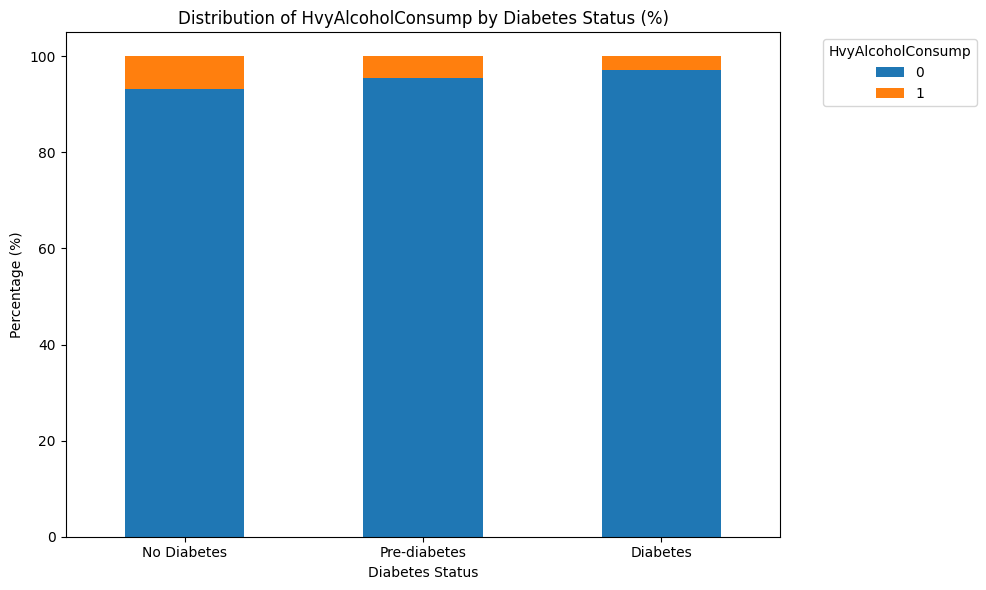

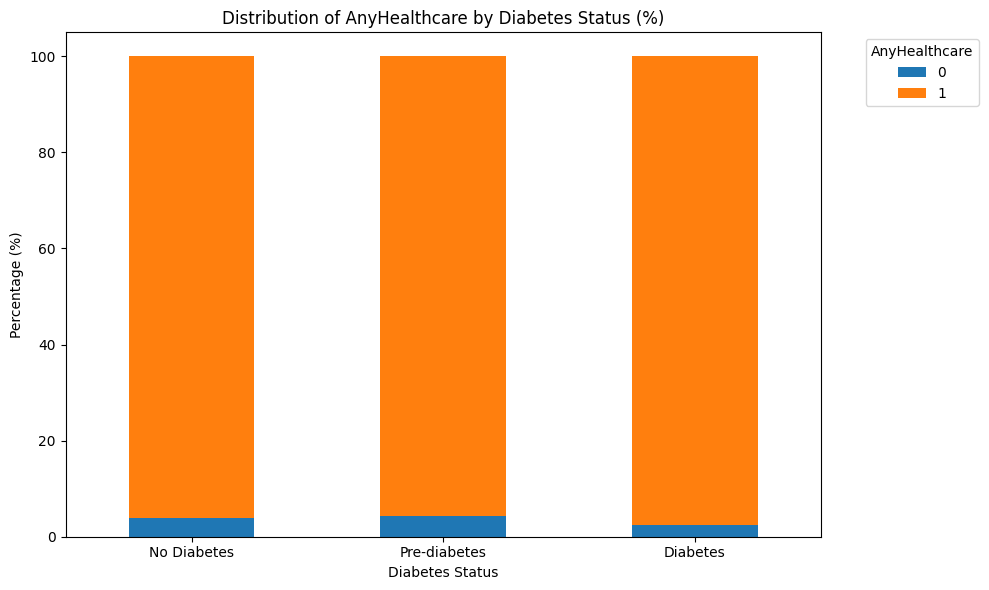

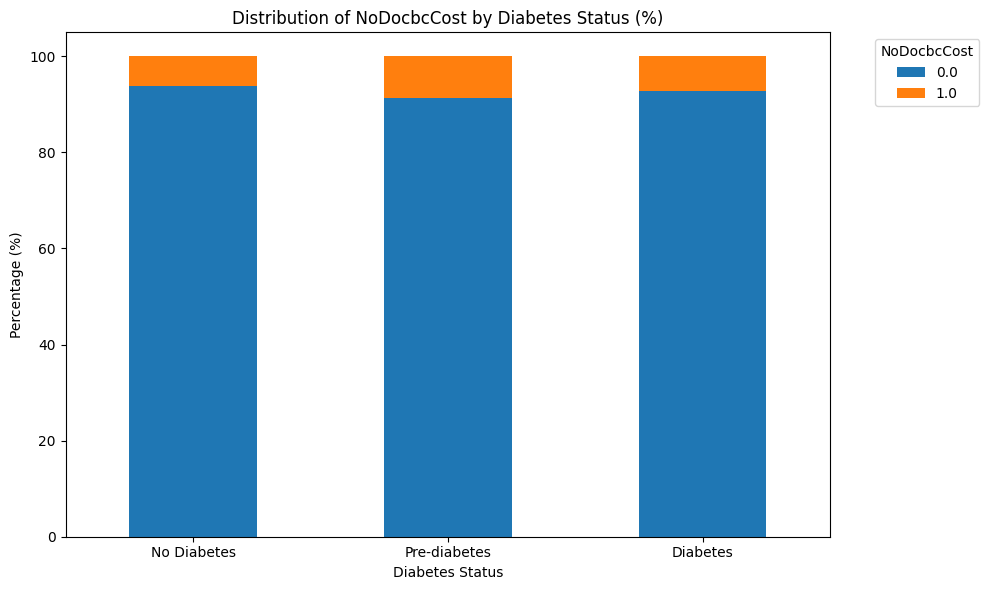

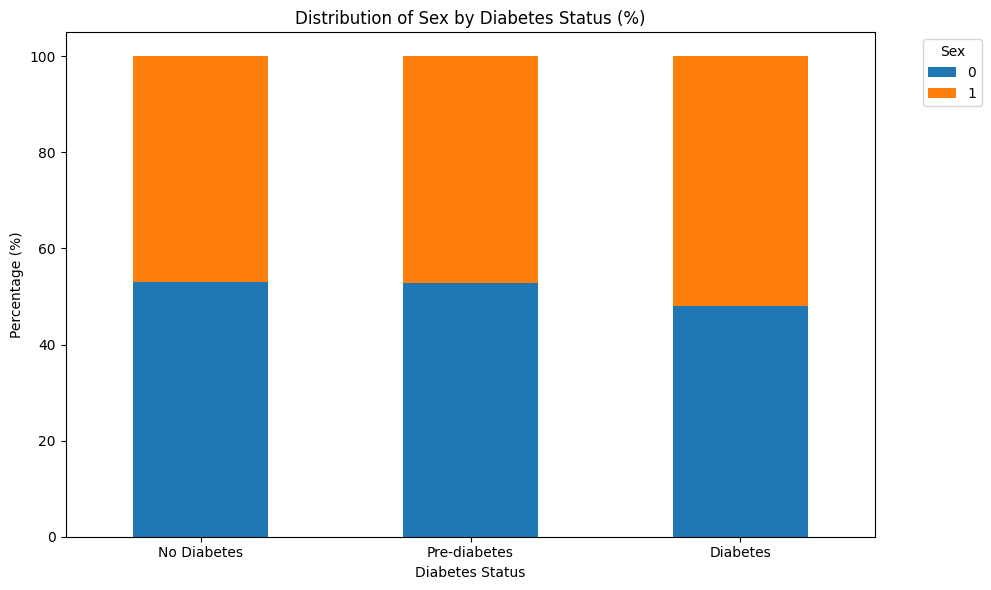

In [61]:

# List of categorical variables (excluding 'Diabetes_012' as it's the target variable)
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Sex']

# Iterate over each categorical variable to calculate and plot distributions by Diabetes_012 status
for cat_var in categorical_vars:
    # Create a pivot table
    pivot_table = pd.pivot_table(df, index='Diabetes_012', columns=cat_var, aggfunc='size', fill_value=0)

    # Convert counts to percentages
    pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

    # Plot
    pivot_table_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Distribution of {cat_var} by Diabetes Status (%)')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Diabetes Status')
    plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes', 'Pre-diabetes', 'Diabetes'], rotation=0)
    plt.legend(title=cat_var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Risk Factors Analysis ###
Investigate how variables such as HighBP, HighChol, BMI, and Smoker are related to diabetes status.

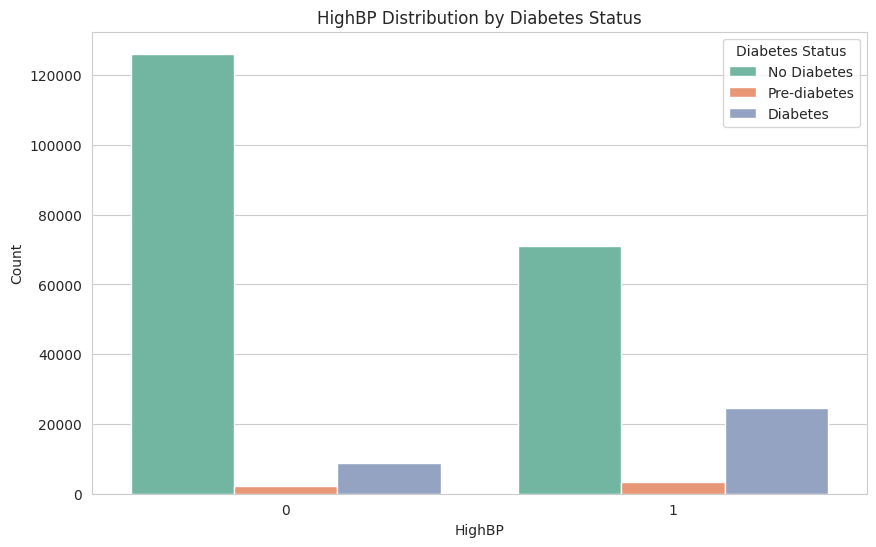

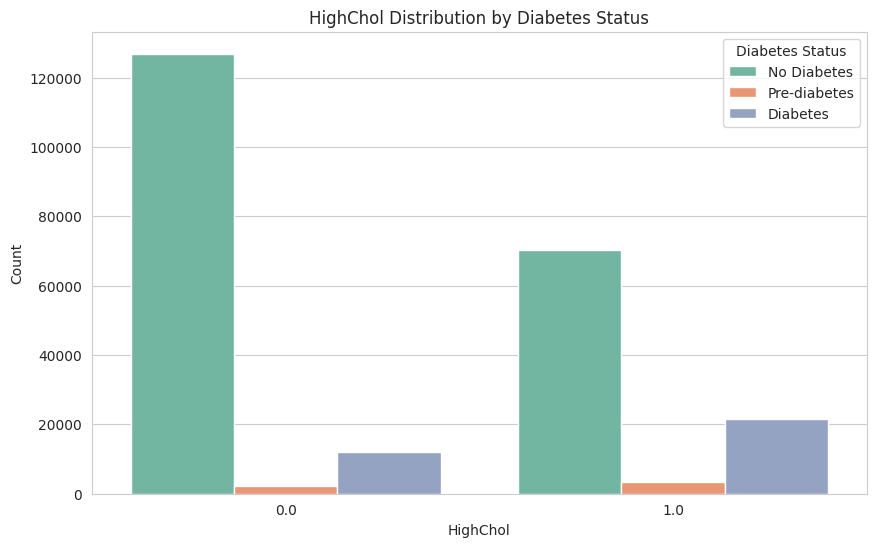

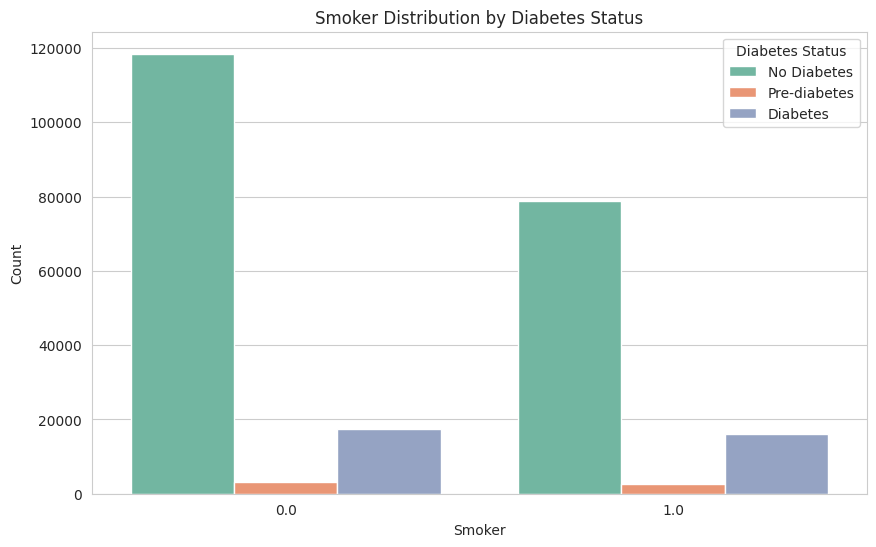

In [63]:
sns.set_style("whitegrid")

categorical_vars = ['HighBP', 'HighChol', 'Smoker']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, hue='Diabetes_012', data=df, palette='Set2')
    plt.title(f'{var} Distribution by Diabetes Status')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Pre-diabetes', 'Diabetes'])
    plt.show()


### Healthcare Access and Utilization: ###

Exploring the relationship between healthcare access variables (e.g., AnyHealthcare, NoDocbcCost) and health outcomes like HeartDiseaseorAttack

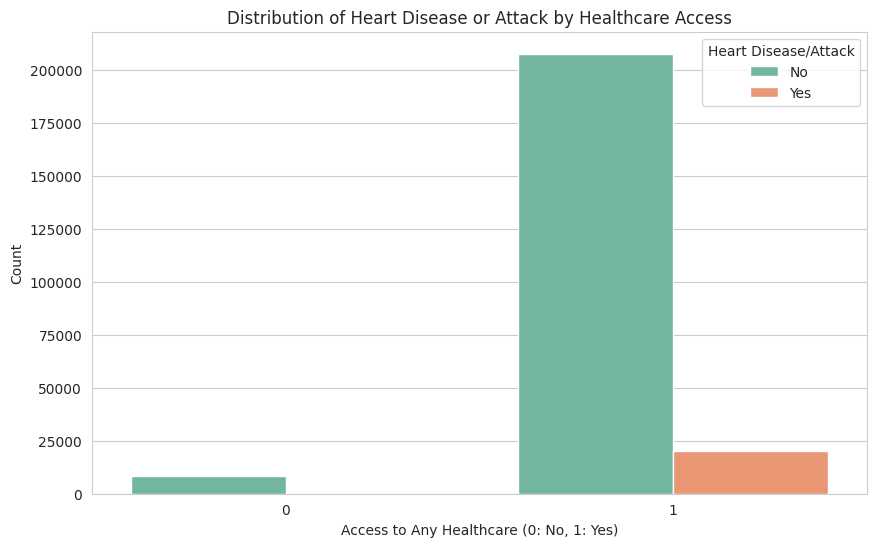

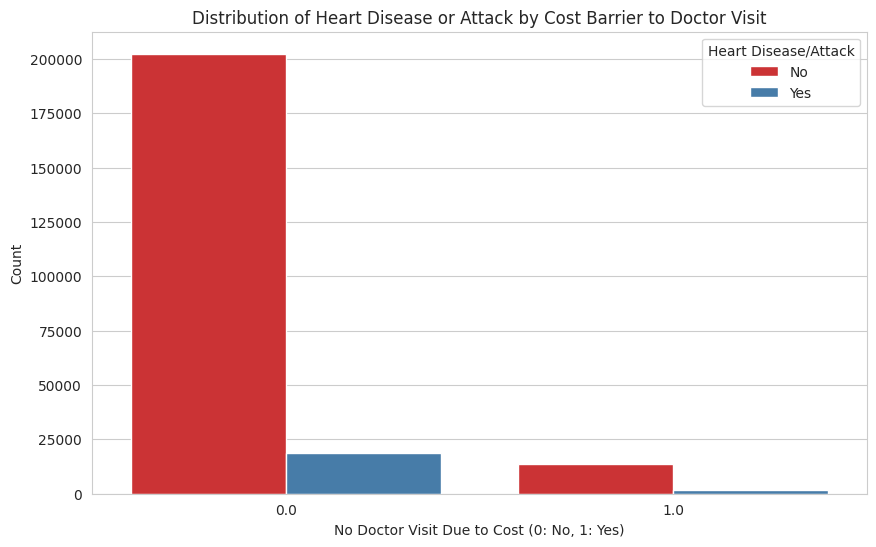

In [68]:
# Plotting the distribution of HeartDiseaseorAttack by AnyHealthcare
plt.figure(figsize=(10, 6))
sns.countplot(x='AnyHealthcare', hue='HeartDiseaseorAttack', data=df, palette='Set2')
plt.title('Distribution of Heart Disease or Attack by Healthcare Access')
plt.xlabel('Access to Any Healthcare (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Disease/Attack', labels=['No', 'Yes'])
plt.show()

# Plotting the distribution of HeartDiseaseorAttack by NoDocbcCost
plt.figure(figsize=(10, 6))
sns.countplot(x='NoDocbcCost', hue='HeartDiseaseorAttack', data=df, palette='Set1')
plt.title('Distribution of Heart Disease or Attack by Cost Barrier to Doctor Visit')
plt.xlabel('No Doctor Visit Due to Cost (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Disease/Attack', labels=['No', 'Yes'])
plt.show()

To further quantify the relationship, we can create a cross-tabulation that shows the percentage of individuals with and without heart disease or attack within each category of the healthcare access variables.

In [65]:
# Cross-tabulation of AnyHealthcare with HeartDiseaseorAttack
cross_tab_anyhealthcare = pd.crosstab(df['AnyHealthcare'], df['HeartDiseaseorAttack'], normalize='index') * 100

# Cross-tabulation of NoDocbcCost with HeartDiseaseorAttack
cross_tab_nodocbcost = pd.crosstab(df['NoDocbcCost'], df['HeartDiseaseorAttack'], normalize='index') * 100

print("Percentage of Heart Disease or Attack by Access to Any Healthcare:")
print(cross_tab_anyhealthcare)

print("\nPercentage of Heart Disease or Attack by No Doctor Visit Due to Cost:")
print(cross_tab_nodocbcost)

Percentage of Heart Disease or Attack by Access to Any Healthcare:
HeartDiseaseorAttack        0.0       1.0
AnyHealthcare                            
0                     94.924833  5.075167
1                     91.206033  8.793967

Percentage of Heart Disease or Attack by No Doctor Visit Due to Cost:
HeartDiseaseorAttack        0.0        1.0
NoDocbcCost                               
0.0                   91.451435   8.548565
1.0                   89.784946  10.215054


### Lifestyle Factors: ###

Analyze PhysActivity, Fruits, Veggies, and HvyAlcoholConsump in relation to diabetes status and other health outcomes.

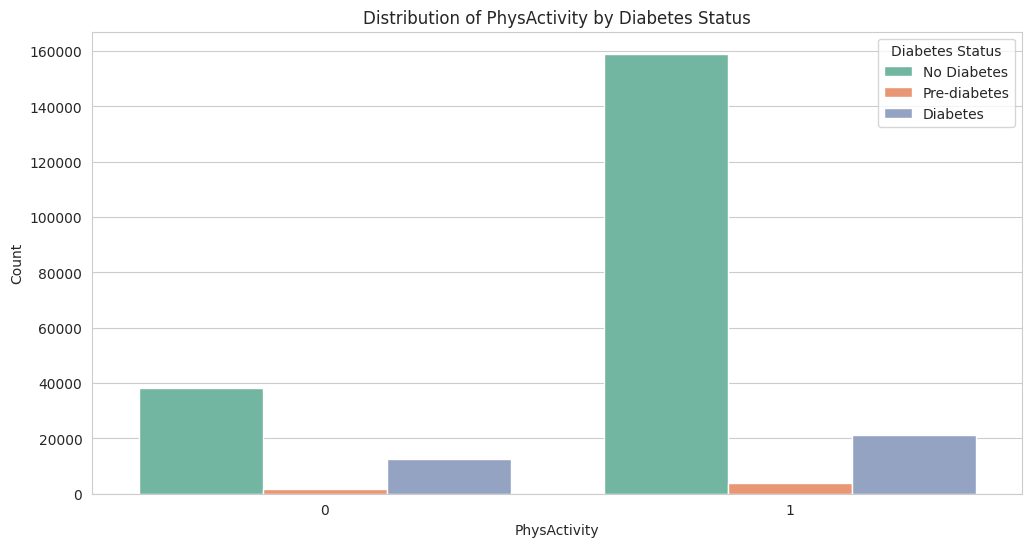

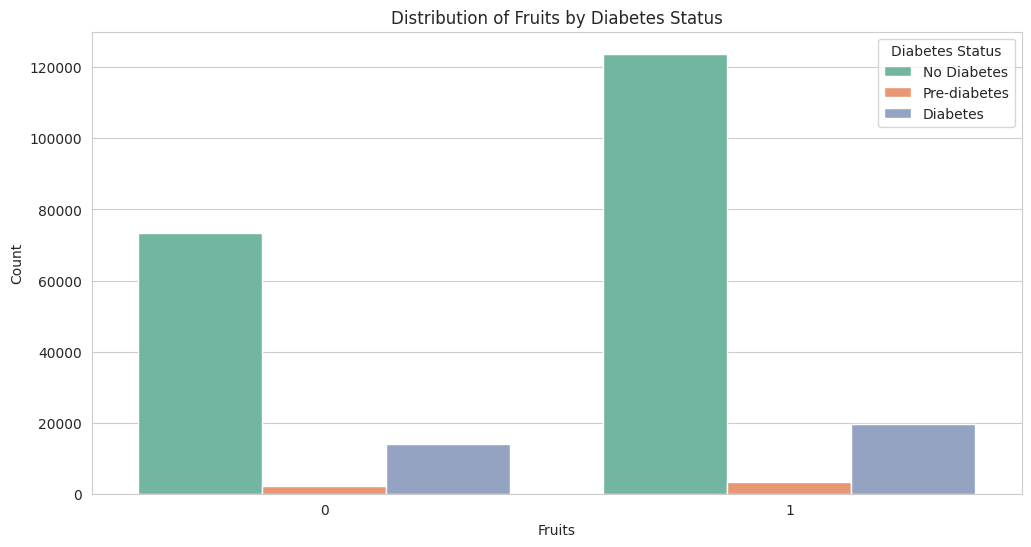

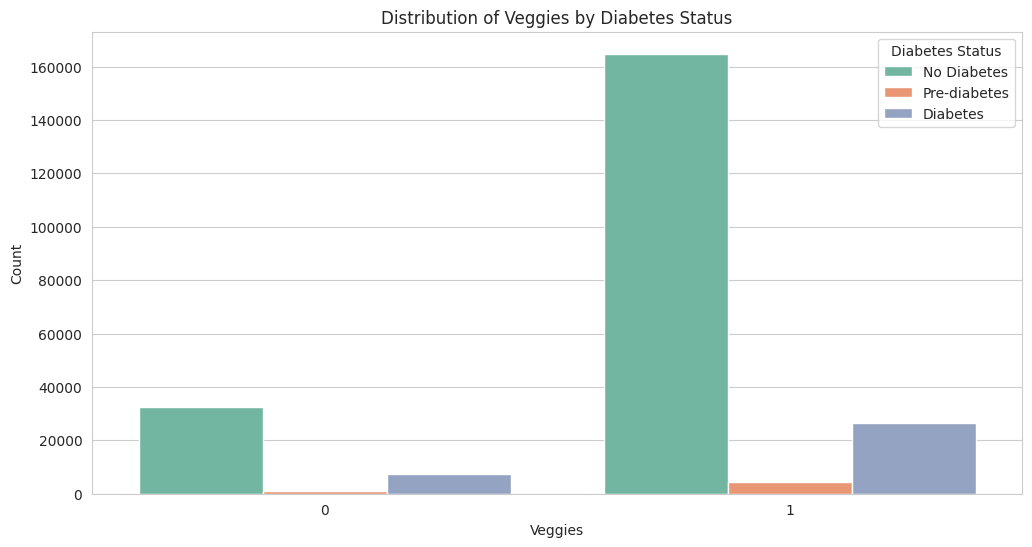

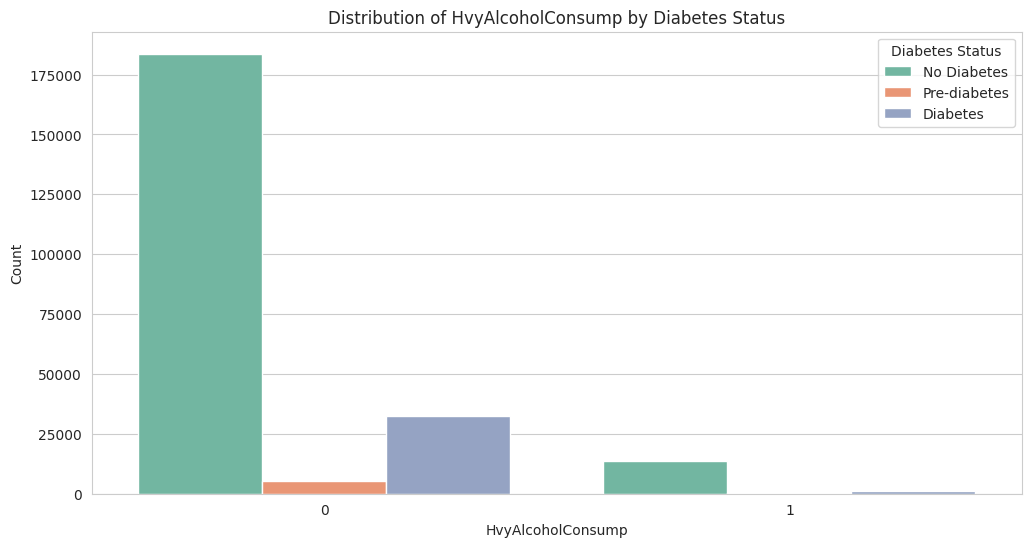

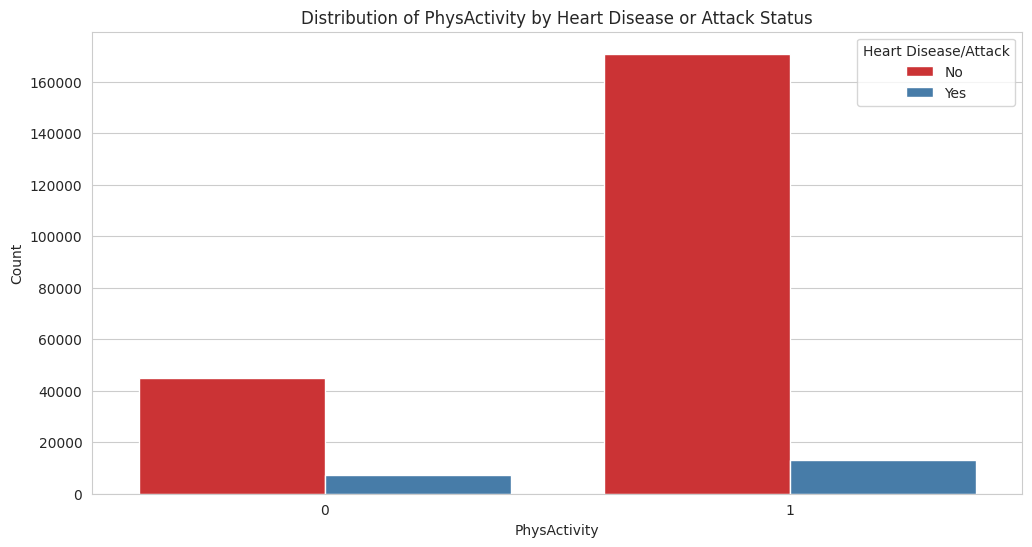

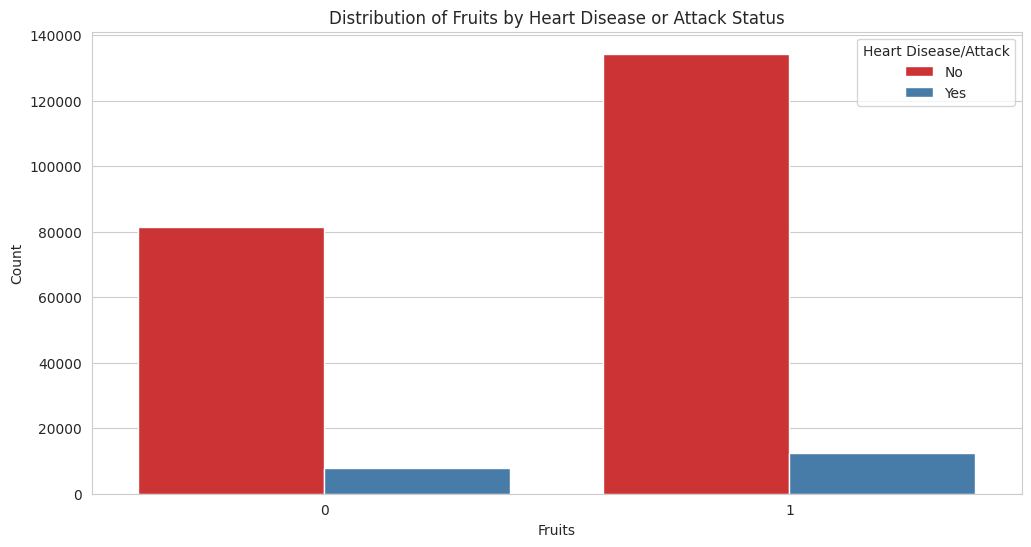

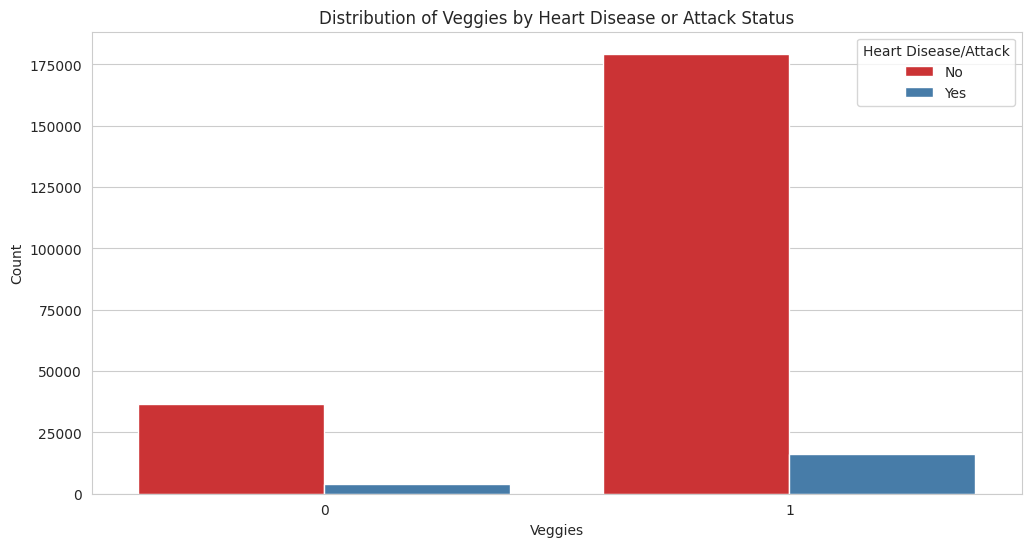

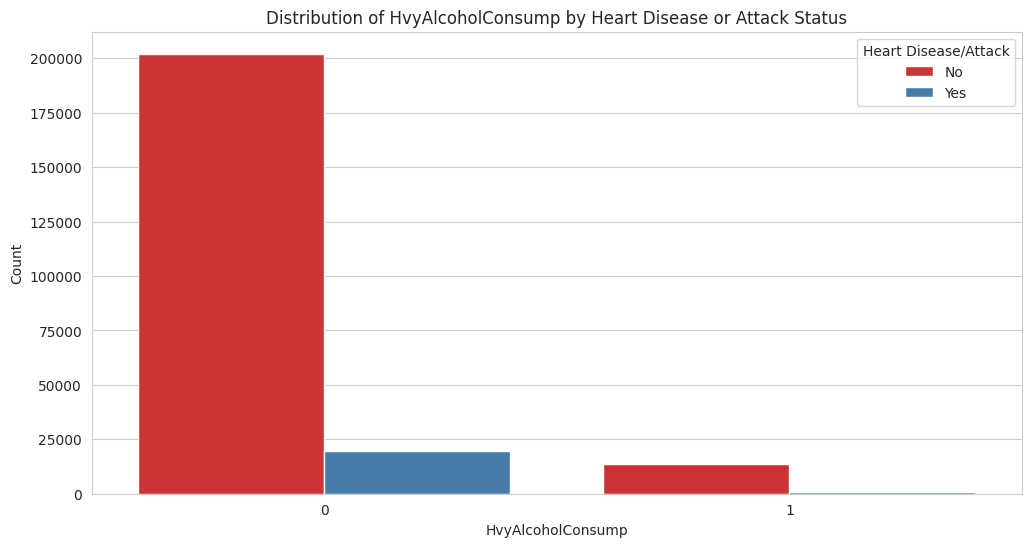

In [69]:
lifestyle_factors = ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
outcome_variables = ['Diabetes_012', 'HeartDiseaseorAttack']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Loop through each lifestyle factor for visualization
for factor in lifestyle_factors:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=factor, hue='Diabetes_012', data=df, palette='Set2')
    plt.title(f'Distribution of {factor} by Diabetes Status')
    plt.xlabel(factor)
    plt.ylabel('Count')
    plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Pre-diabetes', 'Diabetes'])
    plt.show()

### Step 2: Visualizing Lifestyle Factors by Heart Disease or Attack
for factor in lifestyle_factors:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=factor, hue='HeartDiseaseorAttack', data=df, palette='Set1')
    plt.title(f'Distribution of {factor} by Heart Disease or Attack Status')
    plt.xlabel(factor)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease/Attack', labels=['No', 'Yes'])
    plt.show()

### Mental and Physical Health ###

Investigate the MentHlth and PhysHlth variables to see how mental and physical health days affect individuals with different conditions.

In [71]:
# Mean Mental Health Days by Diabetes Status and Heart Disease
mean_menthlth_by_diabetes = df.groupby('Diabetes_012')['MentHlth'].mean()
mean_menthlth_by_heartdisease = df.groupby('HeartDiseaseorAttack')['MentHlth'].mean()

print("Average Mental Health Days by Diabetes Status:")
print(mean_menthlth_by_diabetes)

print("\nAverage Mental Health Days by Heart Disease or Attack Status:")
print(mean_menthlth_by_heartdisease)

# Repeat for Physical Health Days
mean_physhlth_by_diabetes = df.groupby('Diabetes_012')['PhysHlth'].mean()
mean_physhlth_by_heartdisease = df.groupby('HeartDiseaseorAttack')['PhysHlth'].mean()

print("\nAverage Physical Health Days by Diabetes Status:")
print(mean_physhlth_by_diabetes)

print("\nAverage Physical Health Days by Heart Disease or Attack Status:")
print(mean_physhlth_by_heartdisease)

Average Mental Health Days by Diabetes Status:
Diabetes_012
0.0    3.795863
1.0    4.735184
2.0    4.637482
Name: MentHlth, dtype: float64

Average Mental Health Days by Heart Disease or Attack Status:
HeartDiseaseorAttack
0.0    3.853571
1.0    4.825741
Name: MentHlth, dtype: float64

Average Physical Health Days by Diabetes Status:
Diabetes_012
0.0    3.161209
1.0    5.078128
2.0    6.995591
Name: PhysHlth, dtype: float64

Average Physical Health Days by Heart Disease or Attack Status:
HeartDiseaseorAttack
0.0    3.318618
1.0    8.317920
Name: PhysHlth, dtype: float64


### Demographic Analysis ###

How demographic factors like Sex, Age, Education, and Income relate to health outcomes and behaviors.

In [74]:
# Mean BMI accross Sex, Age, Education, Income
for demographic in ['Sex', 'Age', 'Education', 'Income']:
    grouped_data = df.groupby(demographic)['BMI'].mean()
    print(f"Average BMI by {demographic}:")
    print(grouped_data)
    print("\n")

Average BMI by Sex:
Sex
0    28.90389
1    29.00788
Name: BMI, dtype: float64


Average BMI by Age:
Age
1     26.825772
2     28.296487
3     28.885760
4     29.407462
5     29.653389
6     29.993032
7     29.952272
8     29.604238
9     29.303392
10    28.936172
11    28.567528
12    27.985358
13    26.602475
Name: BMI, dtype: float64


Average BMI by Education:
Education
1.0    30.979592
2.0    30.136052
3.0    29.953746
4.0    29.618968
5.0    29.556495
6.0    28.169222
Name: BMI, dtype: float64


Average BMI by Income:
Income
1.0     30.286737
2.0     30.269622
3.0     29.949870
4.0     29.757242
5.0     29.459738
6.0     29.192502
7.0     29.073464
8.0     28.750129
9.0     28.524501
10.0    28.075561
11.0    27.186033
Name: BMI, dtype: float64




In [75]:
def print_cross_tab(df, demographic, outcome_behavior):
    cross_tab = pd.crosstab(df[demographic], df[outcome_behavior], normalize='index') * 100
    print(f"Cross-tabulation of {outcome_behavior} by {demographic} (%):")
    print(cross_tab)
    print("\n")

# Iterate through combinations and perform cross-tabulation
for demographic in demographic_factors:
    for outcome_behavior in health_outcomes_behaviors:
        print_cross_tab(df, demographic, outcome_behavior)


Cross-tabulation of Diabetes_012 by Sex (%):
Diabetes_012        0.0       1.0        2.0
Sex                                         
0             84.547642  2.406203  13.046155
1             82.191647  2.345348  15.463005


Cross-tabulation of HeartDiseaseorAttack by Sex (%):
HeartDiseaseorAttack        0.0        1.0
Sex                                       
0                     93.647463   6.352537
1                     88.829274  11.170726


Cross-tabulation of PhysActivity by Sex (%):
PhysActivity          0          1
Sex                               
0             24.403108  75.596892
1             19.534826  80.465174


Cross-tabulation of Smoker by Sex (%):
Smoker        0.0        1.0
Sex                         
0       62.271228  37.728772
1       55.007216  44.992784


Cross-tabulation of Diabetes_012 by Age (%):
Diabetes_012        0.0       1.0        2.0
Age                                         
1             97.650362  0.901433   1.448205
2             96.46504